In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import table 
import torch
from collections import defaultdict
from sklearn.cluster import KMeans
from collections import defaultdict
from scipy import stats
import scipy
import time
models = ['quilt/B-32/', 'synth_net/B-32/','synth_net_context/B-32/', 'clip/ViT-B_32/']
datasets = ['BACH', 'LC_Lung', 'LC_Colon', 'MHIST', 'Renal_cell', 'Skin_cancer', 'Skin_tumor',
          'CRC', 'SICAP', 'Databiox', 'Camelyon', 'Pannuke_Organ','Pannuke_Cell','Ocelot_Organ','Ocelot_Cell']

pth = 'Test_Results/Zero_Shot_Classification/'

In [2]:
t0 = time.time()
result = dict()
for model in models:
    result[model] = {}
    for dataset in datasets: 
        # Load results
        with open(pth + dataset+"/"+model+'/result.pickle', 'rb') as handle:
            res = pickle.load(handle)

        mistral_accuracies = res['gpt_accuracy']
        result[model][dataset] = mistral_accuracies


In [3]:
def return_val(model, category, result, datasets):
    indices = []
    [indices.append(i) for i in range(len(result['model'])) if result['model'][i] == model ]
    vals = [0] * len(datasets)
    for i in indices:
        data = result['dataset'][i]
        try:
            j = datasets.index(data)
            vals[j] = result[category][i]
        except Exception as e:
             vals[j] = 0
    return vals  

In [4]:
t0 = time.time()
result = defaultdict(list)
for model in models:
    for dataset in datasets:   
        # Load results
        with open(pth + '/'+dataset+"/"+model+'/result.pickle', 'rb') as handle:
            res = pickle.load(handle)
        result['model'].append(model)
        result['dataset'].append(dataset)
        # All accuracies 
        mistral_accuracies = res['gpt_accuracy']
        result['mean'].append(np.around(np.mean(mistral_accuracies), decimals = 2 ))
        result['std'].append(np.around(np.std(mistral_accuracies), decimals = 2 ))

df = pd.DataFrame.from_dict(result)

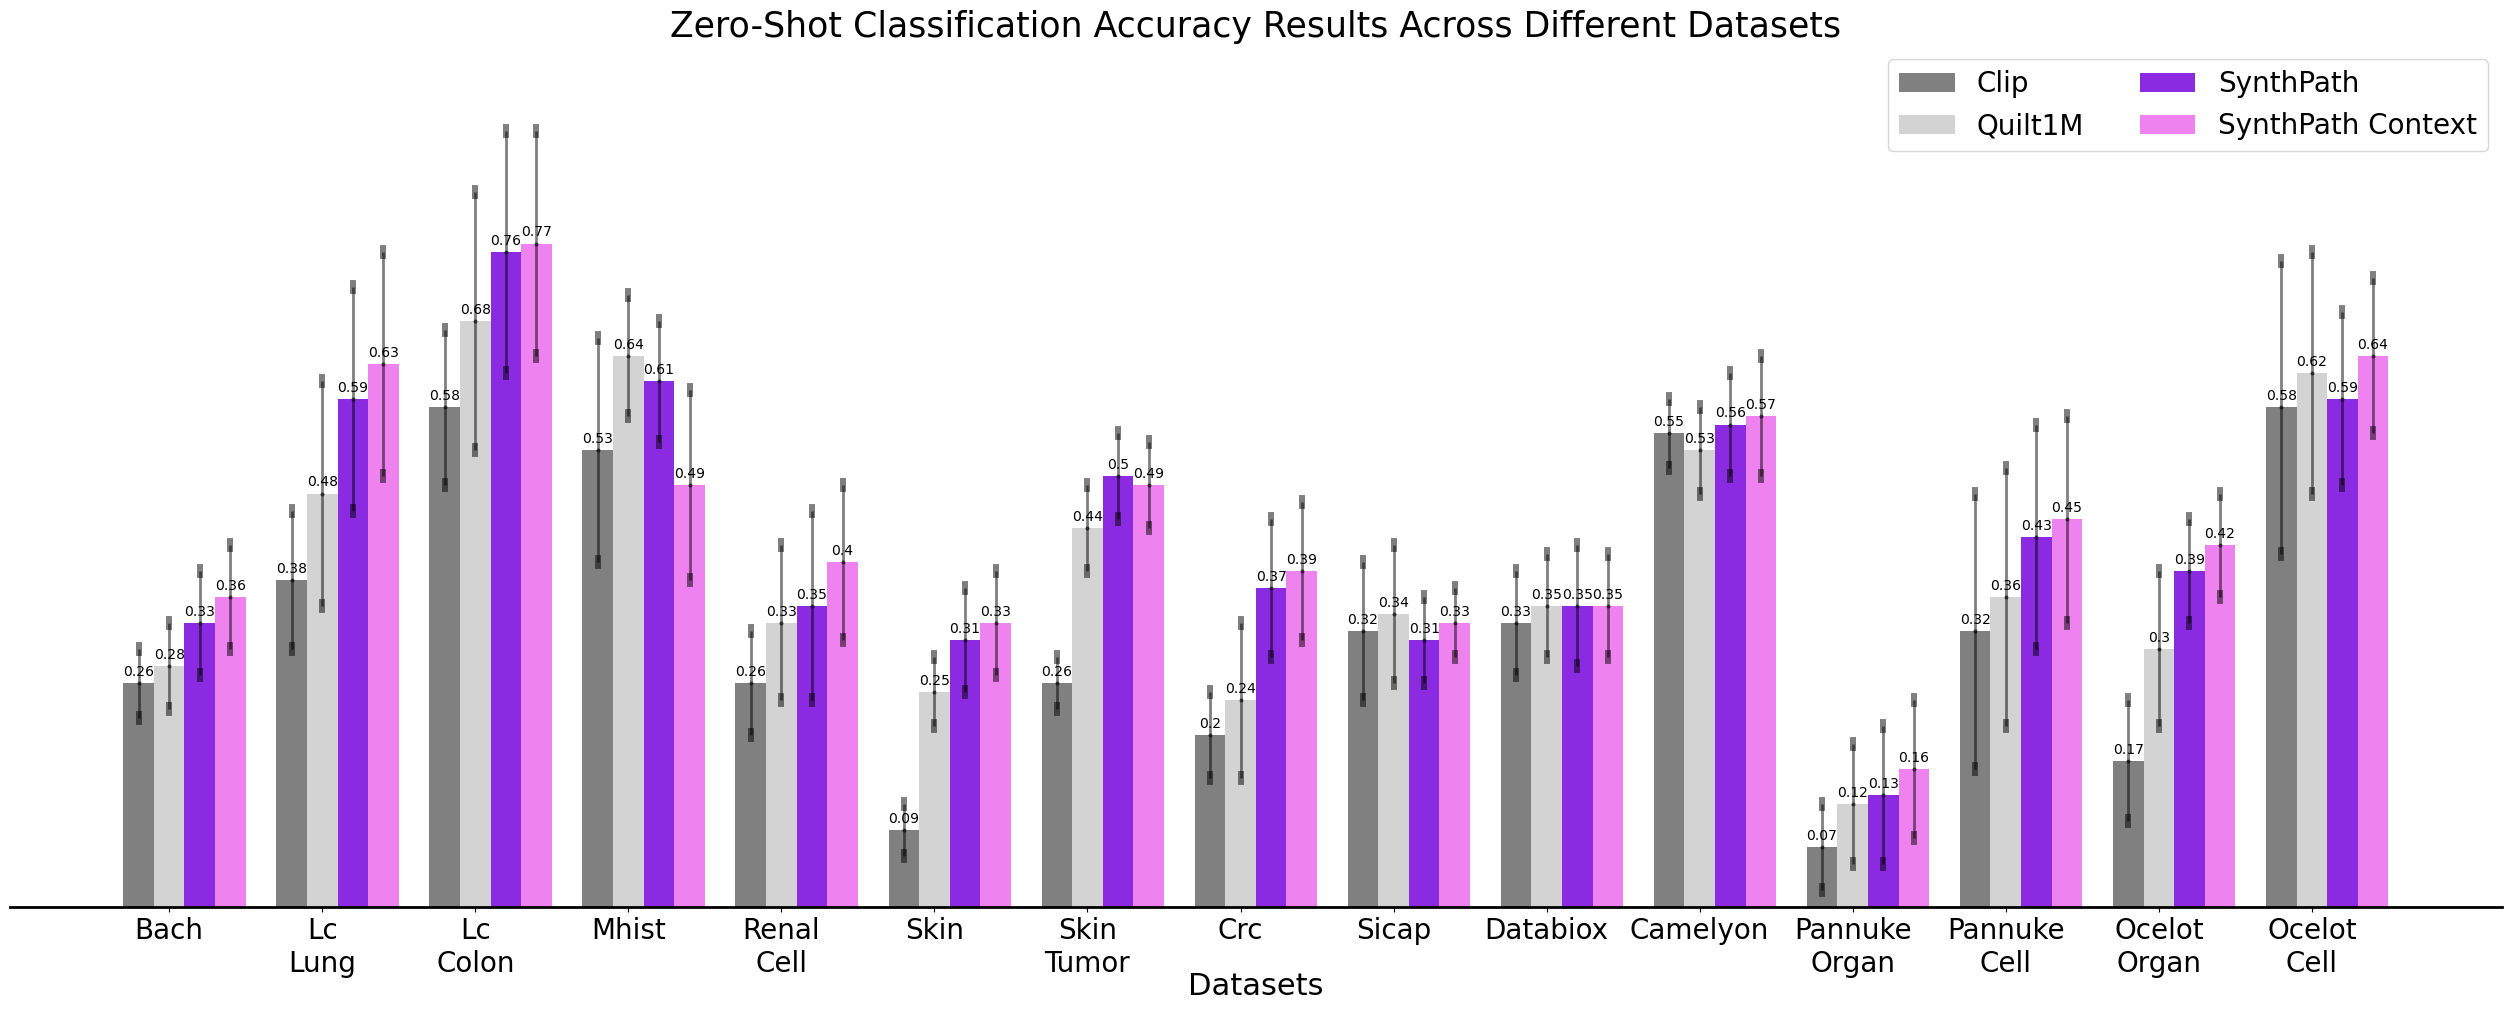

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 2
datasets = ['BACH',  'LC_Lung', 'LC_Colon', 'MHIST', 'Renal_cell', 'Skin_cancer', 'Skin_tumor',
          'CRC', 'SICAP', 'Databiox', 'Camelyon', 'Pannuke_Organ','Pannuke_Cell','Ocelot_Organ','Ocelot_Cell']

category = 'mean'
values = {'Clip': return_val('clip/ViT-B_32/', category, result, datasets),
        'Quilt1M': return_val('quilt/B-32/', category, result,datasets),
        'SynthPath': return_val('synth_net/B-32/', category, result,datasets),
        'SynthPath Context': return_val('synth_net_context/B-32/', category, result,datasets)}
category = 'std'
stds = {'Clip': return_val('clip/ViT-B_32/', category, result,datasets),
        'Quilt1M': return_val('quilt/B-32/', category, result, datasets),
        'SynthPath': return_val('synth_net/B-32/', category, result,datasets),
        'SynthPath Context': return_val('synth_net_context/B-32/', category, result,datasets)}

x = np.arange(len(datasets)) +[0.25 * i for i in range(len(datasets))] # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (25, 10))

count = 0
acc = 0
bar_colors = [ 'violet',  'gray','lightgray', 'blueviolet' ]
for attribute, measurement in values.items():
    count += 1
    if count % len(values.items()):
        acc += 0.25

    offset = width * multiplier
    rects = ax.bar(x + offset, np.around(np.array(measurement), decimals = 2), width, label=attribute, color = bar_colors[count % len(values.items())] )
    ax.bar_label(rects, padding=3)
    ax.errorbar(x + offset, measurement, stds[attribute], fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)
    multiplier += 1 

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Classification Accuracy', fontsize = '22')
ax.set_xlabel('Datasets', fontsize = '22')
ax.xaxis.set_label_coords(0.5, -0.075)
ax.set_title('Zero-Shot Classification Accuracy Results Across Different Datasets', fontsize = '25')
datasets[datasets.index('Skin_cancer')] = 'Skin'
ax.set_xticks(x + width, [dataset.replace('_','\n').title() for dataset in datasets], fontsize = '20')
ax.legend(loc='upper right', fontsize= '20', ncols = 2)
ax.set_ylim(0, 1)
ax.tick_params(axis='y', which='major', labelsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', which='major', labelsize=15)
ax.set_yticks([])
plt.show()